# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
\\
\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
$$

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)


# G:
X: 기온, y:월드콘 판매량 으로 설명    
X1-기온, X2: 광고 => 각 feature의 영향력=> 가중치 W1, W2    

ax + b : 선형관계=> 가설(통계)==>ML에선 알고리즘. a, b를 찾고 그것의 유의성 설명(통계), ML - 찾아서 예측하기.    

- 단순/다중 선형회귀 이야기도 한다.

## 손실(loss)함수/오차(error)함수/비용(cost)함수/목적(objective)함수

- 모델이 출력한 예측값과 실제 값 사이의 차이를 계산하는 함수
- 평가 지표로 사용되기도 하고 모델을 최적화하는데 사용된다.
- 회귀문제의 손실함수의 대표적인것은mse 는 평가 함수 와 손실함수 두개 다 가능


- r2 는 평가지표 만 가능 

## 최적화(Optimize)
- 최적의 성능을 가장 높일 수있는 
- 알맞은 W 값과b값을 찾는게 최적화 그리고 이것들을 찾는게 최적화함수 

- 손실함수의 값(오차)이 최소화 되도록 모델을 학습하는 과정.
- 최적화의 두가지 방법
    - 정규방정식  : w와 b값을 찾는 함수(방정식을 만든다;)
    - 경사하강법  : (정규방정식이 없는경우)오차가 줄어드는 방향으로 값을 다 넣어보는것 

### Boston DataSet
 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0) //강과의 거리 
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%)
 
 - MEDV	: Target.  본인 소유들의 주택가격(중앙값) (단위: $1,000)


In [101]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston['data'], boston.target

In [102]:
df = pd.DataFrame(X, columns=boston.feature_names)
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [103]:
df.CHAS.value_counts()  # 강근처 1, 아님 0

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [104]:
X.shape  # 506개구역의 집값~!

(506, 13)

In [105]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 전처리(회귀는 실수형 값(y)를 예측하니까 즉, 컴럼끼리 계산을 해서 예측해야해서 원핫 인코딩을 쓴다.) 
- 그래서 스케일의 영향도 많이 받음
### 행단위로 계산해서 예측 해야하니까 scaling을 해야함다.
선형회귀 모델사용시 전처리
- 범주형: 원핫 인코딩  //범주형(CHA 컬럼)이니까 값이 숫자 의미가 아니라 단순히 구분을 위한 컬럼이라면.. 
- Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
    - StandardScaler를 사용해 scaling하는 경우 성능이 더 잘나오는 경향이 있다.

In [106]:
# 원핫 인코딩
chas_df = pd.get_dummies(df['CHAS'])
chas_df.columns = ['CHAS_0', 'CHAS_1']
chas_df.head()

,CHAS_0,CHAS_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [107]:
df2 = df.join([chas_df])

In [108]:
df2 = df2.drop(columns='CHAS')

In [109]:
df2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


In [110]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [111]:
type(y)

numpy.ndarray

In [152]:
y = df2['MEDV']
X = df2.drop(columns='MEDV')
X.shape, y.shape

((506, 14), (506,))

In [113]:
np.random.seed(10) # seed 값을 통일해준다 이것으로 통일해서 한번에 
# 같은 순서로 코드를 실행해준다면 항상 같은 값이 나올것이다. 
#하지만 한코드를 여러번실행해버리면 다음 코드가 다른 순서의 값을 갖고 실행하면서 예측예측값이 틀려 질수 잇다.

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [115]:
train_columns = X_train.columns
train_columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [116]:
# 선형 회귀 모델은 scale 영향을 많이 받는다.
# one hot encoding 한 뒤에 train/test 분리후 스케일링 한다. (0,1 이 다른 값으로 바뀌지만 일관되게 바뀌어 모델에 영향을 주지 않는다.)
# 테스트 해보니 성능은 같게 나옴.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## LinearRegression
- 가장 기본적인 선형 회귀 모델

In [117]:
# 평가 지표 출력 함수
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
def print_metrics(y, y_pred, title=None):
    mse = np.round(mean_squared_error(y, y_pred), 3)
    rmse = np.round(np.sqrt(mse), 3)
    mae = np.round(mean_absolute_error(y, y_pred), 3)
    r2 = np.round(r2_score(y, y_pred), 3)
    if title:
        print(title)
    print(f"MSE:{mse}, RMSE:{rmse},MAE:{mae}, R2:{r2}")

In [118]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [119]:
X_train.shape

(404, 14)

In [120]:
lr.coef_.shape  # 컬럼별로 가중치가 있다.

(14,)

In [121]:
# 가중치(회귀계수)와 절편 조회
print('가중치')
lr.coef_ # 학습한 가중치 // 각각의 컬럼의 값들에 가중치를 곱할것이다./// 가중치들의 부호를 갖고 집값과의 상관관계를 알 수있따.

가중치


array([-1.16449629,  1.49915257, -0.05268964, -1.91400079,  2.08637507,
        0.45488752, -3.15772431,  2.71071007, -2.07814318, -1.7549281 ,
        1.08897073, -4.10237313, -0.24654802,  0.24654802])

In [122]:
train_columns  # 크라임이 늘어날수록 가중치와 계산되서 나오는 값은 줄어든다.---> 집값이 줄어든다.(음의 상관관계이다.)

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [123]:
print('절편') ##  각컬럼의 값과 가중치를 곱해서 더하고 마지막에 절편을 더해서 집값을 예측한다.
lr.intercept_

절편


21.84183168316832

In [124]:
# 예측
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_metrics(y_train, pred_train, title='LinearRegressor: Train')
print_metrics(y_test, pred_test, title="LinearRegressor: Trest")


#MAE:4.061 실제갑에대한...>?

LinearRegressor: Train
MSE:19.231, RMSE:4.385,MAE:3.083, R2:0.75
LinearRegressor: Trest
MSE:34.414, RMSE:5.866,MAE:4.061, R2:0.671


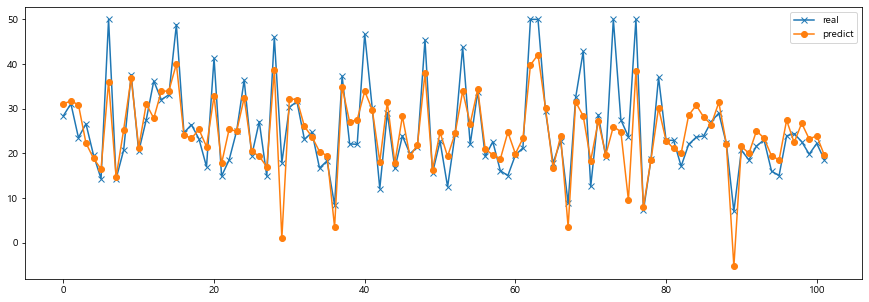

In [125]:
# 실제 값과 예측 가격을 plotting (Test Set 예측결과로)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)), y_test, label='real', marker='x')
plt.plot(range(len(pred_test)), pred_test, label='predict', marker='o')
plt.legend()
plt.show()

# 결과적으로 성능이 좋은 모델은 아니였다.// linearregression 과소적합이 발생할 가능성이 놓다.

# 다항회귀(Polynomial Regression)

- 단순한 직선형 보다 복잡한 비선형의 데이터셋을 학습하기 위한 방식.(방식이 // 공식이 회귀형이라)
- feature들을 거듭제곱한 것과 Feature들을 곱한 새로운 특성들을 추가한 뒤 선형모델로 훈련시킨다.
- `PolynomialFeatures` Transformer를 사용

- 방정식의 형태가 선형이라서/// feature를 추가해서 다항으로 가서 // 다항선형회귀
- **n 차원 이면 컬럼이 n개 이다. 3차원이면 컬럼 3개 3차원 평면(2차원)이 초평면이 된다**

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [40]:
m = 100
X = 6* np.random.rand(m,1) - 3 # shape(100,1). 0~1 실수 
y = X**2 + X+2 + np.random.normal(0,1, size =(m,1))

X.shape, y.shape

((100, 1), (100, 1))

In [41]:
X

array([[ 2.99424309],
       [-1.58346614],
       [-0.62051564],
       [-0.67253555],
       [ 1.01847622],
       [ 2.61323442],
       [ 2.0778655 ],
       [-1.1203589 ],
       [ 0.14728896],
       [-0.33928264],
       [-1.62253672],
       [ 0.20648345],
       [ 2.48377215],
       [-0.25677115],
       [-0.4158086 ],
       [ 2.63476674],
       [ 1.67033542],
       [ 1.2958231 ],
       [ 1.81654502],
       [-2.44319515],
       [ 0.10891529],
       [ 2.19012151],
       [ 1.97488144],
       [ 1.97762016],
       [-1.36170015],
       [-2.64454079],
       [ 1.02316824],
       [ 0.55839311],
       [ 1.02992458],
       [-0.52927273],
       [-1.81469461],
       [-1.26222216],
       [-2.14727919],
       [ 1.69988684],
       [-0.52476695],
       [-2.79497213],
       [ 0.74417992],
       [ 0.96381438],
       [-1.20902823],
       [-0.32319296],
       [-1.66725271],
       [-2.55981497],
       [-0.18456884],
       [-2.42296644],
       [ 2.420221  ],
       [-2

In [42]:
y

array([[15.53787613],
       [ 2.7487883 ],
       [ 0.0354352 ],
       [ 1.53569404],
       [ 4.24884964],
       [12.69002496],
       [ 8.34607003],
       [ 1.36449724],
       [ 1.39493081],
       [ 2.38584908],
       [ 1.46300767],
       [ 2.04435114],
       [ 9.184604  ],
       [ 1.85071305],
       [ 1.78391968],
       [10.9356365 ],
       [ 6.09103957],
       [ 3.80768607],
       [ 7.14092627],
       [ 4.54363113],
       [ 1.81786253],
       [ 8.41633492],
       [ 6.94428296],
       [ 7.11402078],
       [ 2.63904975],
       [ 5.49492277],
       [ 2.23421568],
       [ 1.73009101],
       [ 3.49822404],
       [ 2.63286017],
       [ 4.25725996],
       [ 3.830015  ],
       [ 6.00643804],
       [ 6.1417704 ],
       [-0.02707893],
       [ 5.22506186],
       [ 2.29291824],
       [ 3.49237621],
       [ 2.7889794 ],
       [ 3.08104544],
       [ 3.20665929],
       [ 5.70966842],
       [ 1.45378407],
       [ 4.73536795],
       [ 8.92134509],
       [ 4

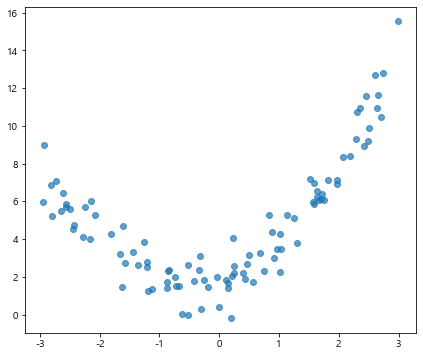

In [45]:
plt.figure(figsize=(7,6))
plt.scatter(X,y, alpha = 0.7);

In [46]:
from sklearn.linear_model import LinearRegression


In [48]:
lr.fit(X,y)
lr.coef_ , lr.intercept_  # 이 값들을 이용해서 에측결과 뽑아낼것~!

(array([[0.92237232]]), array([4.74097125]))

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
pred = lr.predict(X)
mean_squared_error(y,pred), r2_score(y,pred)   #--> 그냥 1차원 선형회귀로 예측 한 평가 

(8.109684161836181, 0.23037436851556792)

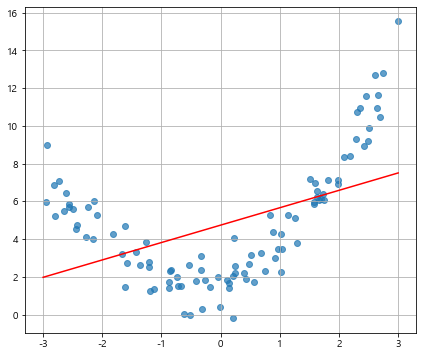

In [52]:
X_new = np.linspace(-3,3,100).reshape(-1,1)  # X_new 새로운데이터 로 예측 
pred_new = lr.predict(X_new)

plt.figure(figsize=(7,6))
plt.scatter(X,y, alpha = 0.7)
plt.plot(X_new,pred_new, color ='red')

plt.grid(True)
plt.show()

In [153]:
# X의 Feature를 늘려서 다항식이 되도록 처리.
from sklearn.preprocessing import PolynomialFeatures


In [83]:
# degree 최고차항 을 지정 /// 전처리를 하는것이다.
poly_f = PolynomialFeatures(degree = 2, include_bias= False)  # X제곱 을 자동으로 해줌.//include_bias : 상수항 추가 여부 (default True)

X_poly = poly_f.fit_transform(X)

In [84]:
X.shape, X_poly.shape # 컬럼이 1 개였는데 2개로 증가했다.

((100, 1), (100, 2))

In [85]:
X[:5]

array([[ 2.99424309],
       [-1.58346614],
       [-0.62051564],
       [-0.67253555],
       [ 1.01847622]])

In [86]:
X_poly[:5] #  X         X**2 /// 맨앞에 꺼는 상수항 이라서 없애 //include_bias= False 이거 지정안하면 다같은값 의 상수항이 하나더생김

array([[ 2.99424309,  8.96549169],
       [-1.58346614,  2.50736501],
       [-0.62051564,  0.38503965],
       [-0.67253555,  0.45230407],
       [ 1.01847622,  1.03729381]])

In [87]:
# 생성된 컬럼들이 어떻게 생성되었는지 확인을  컬럼의 이름으로 파악한다.
poly_f.get_feature_names()  # x0  :x 의첫번째 컬럼, x0^2: 첫번째컬럼 값을 제곱한 값을 가지는 컬럼

['x0', 'x0^2']

In [88]:
lr2 = LinearRegression()
lr2.fit(X_poly,y)

lr2.coef_, lr2.intercept_

(array([[1.00566635, 1.00962832]]), array([1.85129378]))

In [89]:
pred2 = lr2.predict(X_poly)
mean_squared_error(y,pred2), r2_score(y,pred2)  #polynomial하기전 오차 (8.109684161836181, 0.23037436851556792)

(0.8409613661169268, 0.9201910444925137)

In [90]:
X_new_poly = poly_f.transform(X_new)
y_new2 = lr2.predict(X_new_poly)

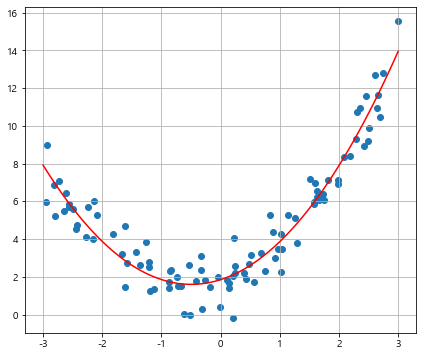

In [91]:
plt.figure(figsize = (7,6))

plt.scatter(X,y)
plt.plot(X_new, y_new2, color ='r')

plt.grid(True)
plt.show()

In [ ]:
# 다항식 degree 가 높으면 학습데이터에 대한 성능은 높아지지만 // test데이터에는 성능이 좋지않아서 과대 적합이 발생할 수 있다.
# 적합한 degree 를 찾아~~

#리니어리그래션에서 그냥 일반 데이터에서 컬럼이 많아져도 과적합이 생길수 있다. 그래서 조정을 해줘야됨
#  ---> 그럼 컬럼을 없애야 되는데 이것을 못하면 규제를 통해서 일반화를 한다. ---> 각각의 가중치를 작게 만들어 줘서 y를 예측할때 영향을 덜미치게 한다.

-----------------------------------polynomial-------------------------------------------------------------

In [96]:
data = np.arange(9).reshape(3,3)
data.shape, data

((3, 3),
 array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]))

In [99]:
poly_f2 =PolynomialFeatures(degree =2, include_bias= False)
data_poly = poly_f2.fit_transform(data)
data_poly.shape, data_poly

((3, 9),
 array([[ 0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
        [ 3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
        [ 6.,  7.,  8., 36., 42., 48., 49., 56., 64.]]))

In [100]:
poly_f2.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

---------------------------------------ㅍ--------------------------------------------------------------

## 보스턴 데이터로  다항회귀(Polynomial Regression) 해보기 // 컬럼개수 =차원수

In [137]:
poly_f = PolynomialFeatures(degree = 5, include_bias= False)
X_train_scaled_poly = poly_f.fit_transform(X_train_scaled)
X_test_scaled_poly = poly_f.transform(X_test_scaled)
X_train_scaled.shape, X_train_scaled_poly.shape

((404, 14), (404, 11627))

In [138]:
lr = LinearRegression()
lr.fit(X_train_scaled_poly,y_train)

LinearRegression()

In [139]:
pred_train2 = lr.predict(X_train_scaled_poly)
pred_test2 = lr.predict(X_test_scaled_poly)

In [134]:
print('PolynomialFeatures 적용전')
print_metrics(y_train, pred_train, title ='Train')
print_metrics(y_test, pred_test, title ='Test')

PolynomialFeatures 적용전
Train
MSE:19.231, RMSE:4.385,MAE:3.083, R2:0.75
Test
MSE:34.414, RMSE:5.866,MAE:4.061, R2:0.671


In [136]:
print('PolynomialFeatures 적용후 결과- dgree:2')

print_metrics(y_train, pred_train2, title = 'Train')
print_metrics(y_test, pred_test2, title ='Test')

PolynomialFeatures 적용후 결과
Train
MSE:5.239, RMSE:2.289,MAE:1.673, R2:0.932
Test
MSE:13.073, RMSE:3.616,MAE:2.818, R2:0.875


In [140]:
print('PolynomialFeatures 적용후 결과- drgree:5')  
# 컬럼수가 늘어났고 ,, train은 100프로 지만,, test는 오차도 많고 성능이 떨어졌다.R2를 보면 평균보다도 못했다.
# 데이터를 늘리면 어느정도 해결가능~!

print_metrics(y_train, pred_train2, title = 'Train')
print_metrics(y_test, pred_test2, title ='Test')

PolynomialFeatures 적용후 결과- drgree:5
Train
MSE:0.0, RMSE:0.0,MAE:0.0, R2:1.0
Test
MSE:1553.112, RMSE:39.41,MAE:14.177, R2:-13.851


In [ ]:
#리니어리그래션에서 그냥 일반 데이터에서 컬럼이 많아져도 과적합이 생길수 있다. 그래서 조정을 해줘야됨
#  ---> 그럼 컬럼을 없애야 되는데 이것을 못하면 규제를 통해서 일반화를 한다. ---> 각각의 가중치를 작게 만들어 줘서 y를 예측할때 영향을 덜미치게 한다.

# Guide
- l1: 라쏘, l2: 릿지

## 규제 (Regularization)
- LinearRegression 은 파라 미터가 없고 ,, 규제파라미터를 갖고있는 클래스를 제공한다 그게 릿지와 라쏘이다.

- 선형 회귀 모델에서 과적합 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용하는 것.--> 가중치의 값을 작게 만드는...
- 입력데이터의 Feature들이 너무 많은 경우 과적합이 발생.
    - Feature수에 비해 관측치 수(데이터)가 적은 경우 모델이 복잡해 지면서 과적합이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.
    - 가중치를 줄여서 y값을 예측하는데에 관여도?를 적게만들어서 feature수 감소 효과를 본다.
    

## Ridge Regression
-- 기본적인 모델은 linear regressiion 의 공식을 쓴다.

-- 규제강도가 낮아지면 곡선이 완만해짐


- linear 함수의  
 - 규제해서 오차를 줄인다
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일,, 규제가 0되니까, )
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 output에 대한 영향력이 작아지게 된다.
    - 영향력이 작아지면서 모델이 일반화되는 효과를 볼 수 있다.
    - #### 가중치가 점점 0에 가깝게 바뀌면서 일반화되고 있고 너무 0에 가까워지면 과소적합이 일어날 수 있다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [158]:
from sklearn.linear_model import Ridge

ridge_1 = Ridge() #alpha(하이퍼파라미터) : 기본값  : 1
#ridge_1 = Ridge(alpha=25)
ridge_1.fit(X_train_scaled, y_train)

pred_train = ridge_1.predict(X_train_scaled)
pred_test = ridge_1.predict(X_test_scaled)

In [159]:
# 알파 1
print_metrics(y_train, pred_train, title='Ridge alpha 1: Train')
print_metrics(y_test, pred_test, title="Ridge alpha 1: Trest")

Ridge alpha 1: Train
MSE:19.233, RMSE:4.386,MAE:3.079, R2:0.75
Ridge alpha 1: Trest
MSE:34.392, RMSE:5.864,MAE:4.058, R2:0.671


In [157]:
# 알파 25 - 알파가 커지면서 오차가 커지고 가중치(W)는 작아진다.
print_metrics(y_train, pred_train, title='Ridge alpha 1: Train')
print_metrics(y_test, pred_test, title="Ridge alpha 1: Trest")

Ridge alpha 1: Train
MSE:19.679, RMSE:4.436,MAE:3.038, R2:0.744
Ridge alpha 1: Trest
MSE:34.397, RMSE:5.865,MAE:4.029, R2:0.671


## GridSearchCV 

In [28]:
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.01, 0.1,0.5,1,10,20,30,40,50,100]}
ridge = Ridge()
gs = GridSearchCV(ridge, param_grid = param, cv = 5, n_jobs=-1, scoring=['r2','neg_mean_squared_error'], refit='r2')

In [29]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 20, 30, 40, 50, 100]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [30]:
import pandas as pd
cv_result = pd.DataFrame(gs.cv_results_).sort_values('rank_test_neg_mean_squared_error')
cv_result.filter(like='mean_test').join(cv_result.filter(like='param'))

,mean_test_r2,mean_test_neg_mean_squared_error,param_alpha,params
3,0.718794,-21.376445,1,{'alpha': 1}
2,0.718655,-21.385044,0.5,{'alpha': 0.5}
1,0.718526,-21.393176,0.1,{'alpha': 0.1}
4,0.718805,-21.394979,10,{'alpha': 10}
0,0.718495,-21.395170,0.01,{'alpha': 0.01}
5,0.716538,-21.573478,20,{'alpha': 20}
6,0.713520,-21.804009,30,{'alpha': 30}
7,0.710194,-22.056093,40,{'alpha': 40}
8,0.706720,-22.318945,50,{'alpha': 50}
9,0.688732,-23.681505,100,{'alpha': 100}


In [144]:
#Guide
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
# g = GradientBoostingRegressor(n_estimators=100, max_depth=3)
g = XGBRegressor(n_estimators=100, max_depth=3)
g.fit(X_train_scaled, y_train)
print(mean_squared_error(y_train, g.predict(X_train_scaled)))
print(mean_squared_error(y_test, g.predict(X_test_scaled)))

0.3465462248127323
10.635201710454098


In [32]:
pd.Series(g.feature_importances_, index=X_train.columns).sort_values(ascending=False)

LSTAT      0.485681
RM         0.204852
PTRATIO    0.118806
DIS        0.051945
TAX        0.033623
CRIM       0.026394
NOX        0.025778
RAD        0.020495
AGE        0.011515
INDUS      0.009429
B          0.009086
ZN         0.002396
CHAS_0     0.000000
CHAS_1     0.000000
dtype: float32

In [160]:
#### 가중치가 점점 0에 가깝게 바뀌면서 일반화되고 있고 너무 0에 가까워지면 과소적합이 일어날 수 있다.

## 규제 alpha 에 따른 weight 변화

	**Ridge alpha 0: Train**
MSE:19.245, RMSE:4.387,MAE:3.088, R2:0.75
	**Ridge alpha  0: Test**
MSE:34.666, RMSE:5.888,MAE:4.07, R2:0.669
--------------------------------------------------
	**Ridge alpha 0.1: Train**
MSE:19.231, RMSE:4.385,MAE:3.083, R2:0.75
	**Ridge alpha  0.1: Test**
MSE:34.412, RMSE:5.866,MAE:4.061, R2:0.671
--------------------------------------------------
	**Ridge alpha 1: Train**
MSE:19.233, RMSE:4.386,MAE:3.079, R2:0.75
	**Ridge alpha  1: Test**
MSE:34.392, RMSE:5.864,MAE:4.058, R2:0.671
--------------------------------------------------
	**Ridge alpha 10: Train**
MSE:19.344, RMSE:4.398,MAE:3.051, R2:0.749
	**Ridge alpha  10: Test**
MSE:34.304, RMSE:5.857,MAE:4.037, R2:0.672
--------------------------------------------------
	**Ridge alpha 100: Train**
MSE:21.586, RMSE:4.646,MAE:3.109, R2:0.72
	**Ridge alpha  100: Test**
MSE:36.307, RMSE:6.026,MAE:4.153, R2:0.653
--------------------------------------------------
	**Ridge alpha 200: Train**
MSE:23.931, RMSE:4.892

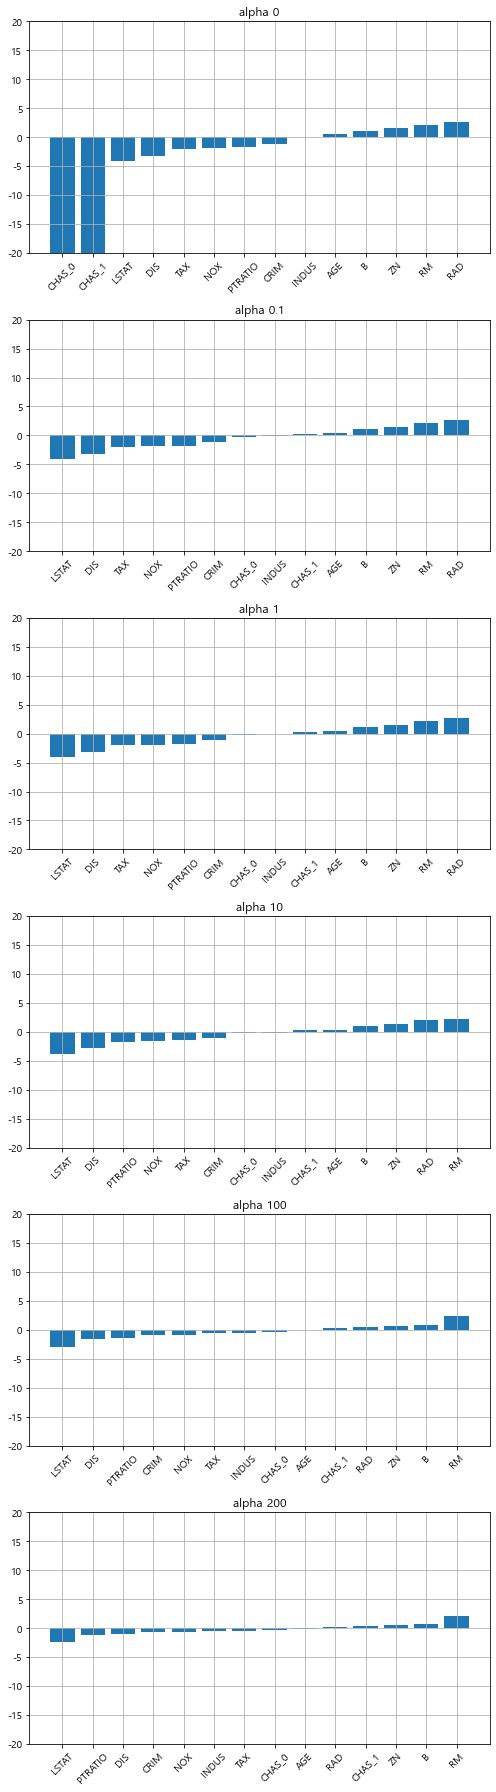

In [146]:
import matplotlib.pyplot as plt
np.random.seed(1)
alpha_list = [0, 0.1, 1, 10, 100,200]
coef_df = pd.DataFrame()

plt.figure(figsize=(7,25))
for idx, alpha in enumerate(alpha_list, start=1):
#     print(alpha)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    pred_train = ridge.predict(X_train_scaled)
    pred_test = ridge.predict(X_test_scaled)

    print_metrics(y_train, pred_train, title=f'\t**Ridge alpha {alpha}: Train**')
    print_metrics(y_test, pred_test, title=f"\t**Ridge alpha  {alpha}: Test**")
    print("-"*50)
    w = pd.Series(np.round(ridge.coef_,3), index=X_train.columns).sort_values()
    coef_df[f'alpha {alpha}'] = w
    plt.subplot(6,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20) # y를 고정해야 변화가 잘 보인다.
    plt.title(f"alpha {alpha}")
    plt.grid(True)
    
plt.tight_layout() #간격 자동조절
plt.show()

#### 가중치가 점점 0에 가깝게 바뀌면서 일반화되고 있고 너무 0에 가까워지면 과소적합이 일어날 수 있다.

In [34]:
coef_df

,alpha 0,alpha 0.1,alpha 1,alpha 10,alpha 100,alpha 200
CHAS_0,-4.140395e+14,-0.247,-0.249,-0.267,-0.328,-0.343
CHAS_1,-4.140395e+14,0.247,0.249,0.267,0.328,0.343
LSTAT,-4.184000e+00,-4.100,-4.082,-3.915,-2.956,-2.428
DIS,-3.180000e+00,-3.154,-3.122,-2.832,-1.475,-0.933
TAX,-1.983000e+00,-2.070,-1.999,-1.489,-0.543,-0.455
NOX,-1.920000e+00,-1.911,-1.881,-1.631,-0.776,-0.573
PTRATIO,-1.749000e+00,-1.754,-1.746,-1.681,-1.389,-1.223
CRIM,-1.148000e+00,-1.163,-1.153,-1.071,-0.779,-0.671
INDUS,-2.000000e-02,-0.055,-0.076,-0.218,-0.464,-0.499
AGE,5.430000e-01,0.454,0.441,0.341,-0.031,-0.154


# Ridge , Lasso 둘다  "𝛼"가 파라미터이다.

## Lasso(Least Absolut Shrinkage and Selection Operator) Regression

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.
- 릿지는 0이 되지 않지만 라쏘는 점점 0으로 가까워지다가 0으로 만들어버린다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [35]:
from sklearn.linear_model import Lasso


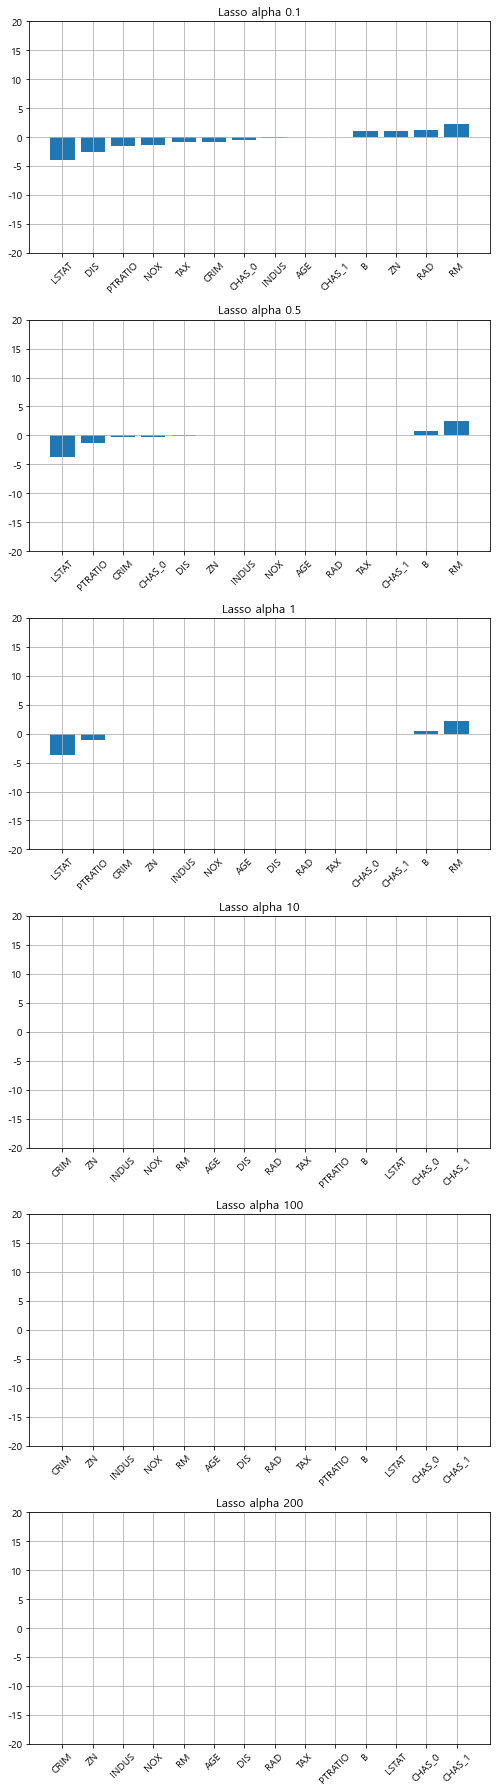

In [149]:
import matplotlib.pyplot as plt
alpha_list = [0.1, 0.5, 1, 10, 100, 200]

lasso_coef_df = pd.DataFrame()

plt.figure(figsize=(7,25))
for idx, alpha in enumerate(alpha_list, start=1):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    
    w = pd.Series(lasso.coef_, index=X_train.columns).sort_values()
    lasso_coef_df[f'alpha {alpha}'] = w
    plt.subplot(6,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20)
    plt.grid(True)
    plt.title(f"Lasso alpha {alpha}")
    
plt.tight_layout() #간격 자동조절
plt.show()    

In [150]:
lasso_coef_df

,alpha 0.1,alpha 0.5,alpha 1,alpha 10,alpha 100,alpha 200
LSTAT,-3.953760,-3.786105e+00,-3.716066,-0.0,-0.0,-0.0
DIS,-2.583343,-1.461124e-01,-0.000000,0.0,0.0,0.0
PTRATIO,-1.586031,-1.381795e+00,-1.134171,-0.0,-0.0,-0.0
NOX,-1.285815,-0.000000e+00,-0.000000,-0.0,-0.0,-0.0
TAX,-0.889314,-0.000000e+00,-0.000000,-0.0,-0.0,-0.0
CRIM,-0.870261,-2.735807e-01,-0.012648,-0.0,-0.0,-0.0
CHAS_0,-0.481594,-2.276756e-01,-0.000000,-0.0,-0.0,-0.0
INDUS,-0.121812,-0.000000e+00,-0.000000,-0.0,-0.0,-0.0
AGE,0.000000,0.000000e+00,-0.000000,-0.0,-0.0,-0.0
CHAS_1,0.000000,2.110523e-16,0.000000,0.0,0.0,0.0


## 엘라스틱넷
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 라쏘 규제항을 더해서 추가한다. 
- 혼합비율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [151]:
from sklearn.linear_model import ElasticNet  #l1 = 라쏘 l1_ratio=0.6  , l2 = 릿지 
  
elastic = ElasticNet(alpha=0.1, l1_ratio=0.6) #alpha 페날티, l1_ratio: 비율(라쏘쪽. 위의것으로 보면 앞의것의 r 지정.)
elastic.fit(X_train_scaled, y_train)

pred_train = elastic.predict(X_train_scaled)
pred_test = elastic.predict(X_test_scaled)

print_metrics(y_train, pred_train, title='ElasticNet alpha 0.1: Train')
print_metrics(y_test, pred_test, title="ElasticNet alpha 0.1: Trest")

ElasticNet alpha 0.1: Train
MSE:19.854, RMSE:4.456,MAE:3.039, R2:0.742
ElasticNet alpha 0.1: Trest
MSE:34.342, RMSE:5.86,MAE:4.025, R2:0.672


# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 릿지를 사용한다.  --> 라쏘는 0으로 만들어 버려서....
- Target에 영향을 주는 Feature가 **몇 개뿐**일 경우 특성의 가중치를 0으로 만들어 주는 라쏘 사용한다.
--->(몇개없으니까 자동으로 feature selection이 되면 편)
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 엘라스틱넷을 사용한다.
- 엘라스틱넷 -->데이터의 양보다 컬럼의 수가 많을때~!